In [2]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
shopping=pd.read_csv('online_shoppers_intention.csv')

### Attribute Information:

### Some Analysis to Understand the Data

In [3]:
#Print the first 5 rows of the dataframe.
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# check the shape of the data-number of rows and number of columns
shopping.shape
#The dataset consists of 10 numerical and 8 categorical attributes. 
#The 'Revenue' attribute can be used as the class label. 


(12330, 18)

In [5]:
# check the columns in the dataset
shopping.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
## gives information about the data types,columns, null value counts, memory usage etc
shopping.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [7]:
# create a copy of original data
data=shopping.copy()

In [8]:
### basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
shopping.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
# create a new dataframe only for numerical features
num_data=shopping.select_dtypes(exclude=['object','bool']).head()

In [10]:
for i in shopping.columns:
    print('Number of unique values in ',i,data[i].nunique())

Number of unique values in  Administrative 27
Number of unique values in  Administrative_Duration 3335
Number of unique values in  Informational 17
Number of unique values in  Informational_Duration 1258
Number of unique values in  ProductRelated 311
Number of unique values in  ProductRelated_Duration 9551
Number of unique values in  BounceRates 1872
Number of unique values in  ExitRates 4777
Number of unique values in  PageValues 2704
Number of unique values in  SpecialDay 6
Number of unique values in  Month 10
Number of unique values in  OperatingSystems 8
Number of unique values in  Browser 13
Number of unique values in  Region 9
Number of unique values in  TrafficType 20
Number of unique values in  VisitorType 3
Number of unique values in  Weekend 2
Number of unique values in  Revenue 2


In [11]:
# check the missing values
def missing_check(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
    return missing_data[missing_data.percent!=0.0]
missing_check(shopping)

,total,percent


In [12]:
shopping.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
# there is no null values in the dataset

In [14]:
Numerical_features=['Administrative', 'Informational','Administrative_Duration',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'TrafficType']
Categorical_features=['SpecialDay','Month',
       'OperatingSystems', 'Browser', 'Region', 'VisitorType',
       'Weekend', 'Revenue']

# Data visualization

# a) Univariate Analysis

In [15]:
#Numerical_features

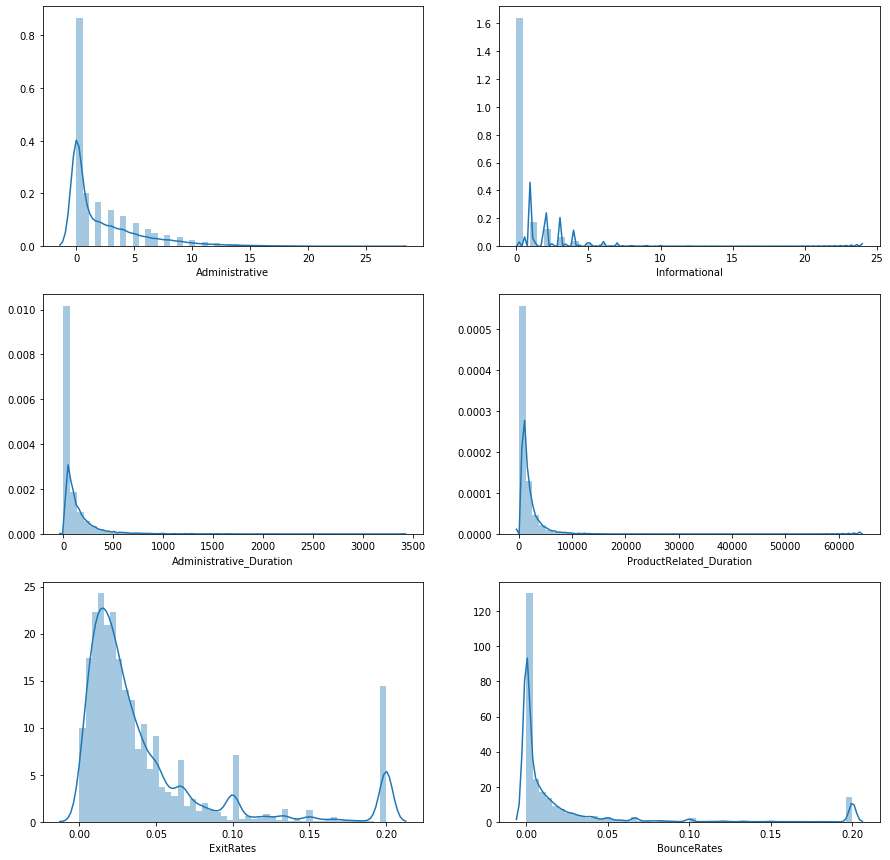

In [16]:
# check the distribution of the data in each feature
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.distplot(shopping['Administrative'])
plt.subplot(3, 2, 2)
sns.distplot(shopping['Informational'])
plt.subplot(3, 2, 3)
sns.distplot(shopping['Administrative_Duration'])
plt.subplot(3, 2, 4)
sns.distplot(shopping['ProductRelated_Duration'])
plt.subplot(3, 2, 5)
sns.distplot(shopping['ExitRates'])
plt.subplot(3, 2, 6)
sns.distplot(shopping['BounceRates'])

In [17]:
# most of the features are right skewed.. we can do the suitable transformation to handle the right skewed data.

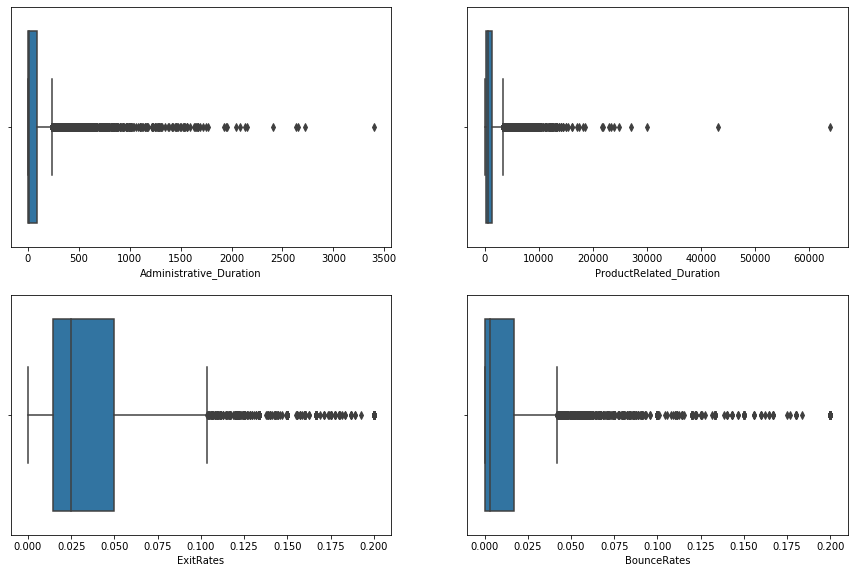

In [18]:
# We will use Boxplot to check the outliers in the numerical featuers
plt.figure(figsize=(15,15))
# plt.subplot(3, 2, 1)
# sns.boxplot(shopping['Administrative'])
# plt.subplot(3, 2, 2)
# sns.boxplot(shopping['Informational'])
plt.subplot(3, 2, 3)
sns.boxplot(shopping['Administrative_Duration'])
plt.subplot(3, 2, 4)
sns.boxplot(shopping['ProductRelated_Duration'])
plt.subplot(3, 2, 5)
sns.boxplot(shopping['ExitRates'])
plt.subplot(3, 2, 6)
sns.boxplot(shopping['BounceRates'])

In [19]:
# there are many outliers but we can't remove the outliers because it may effect the behaviour of the customer so 
# we will loose the info.

In [20]:
shopping['Revenue'].unique()

array([False,  True])

In [21]:
shopping[(shopping['ProductRelated_Duration']<184) & (shopping['Revenue']==False) ]['ProductRelated'].nunique()

25

In [22]:
shopping[(shopping['ProductRelated_Duration']<184) & (shopping['Revenue']==True) ]['ProductRelated'].nunique()
# ProductRelated_Duration is less but still transcation done

17

In [23]:
# for the categorical features we will use countplot

In [24]:
shopping['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

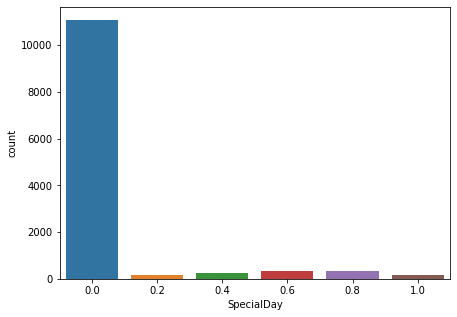

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(shopping['SpecialDay'])

In [26]:
shopping.Month.value_counts().index

Index(['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'], dtype='object')

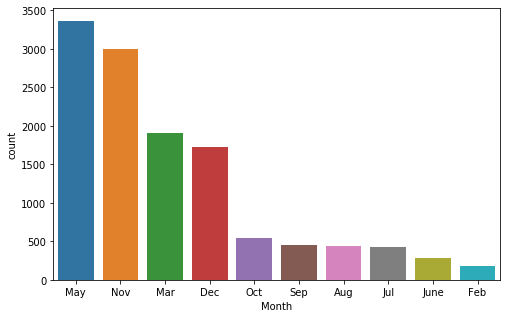

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data['Month'],order=['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'])
# In May there are more  number of users

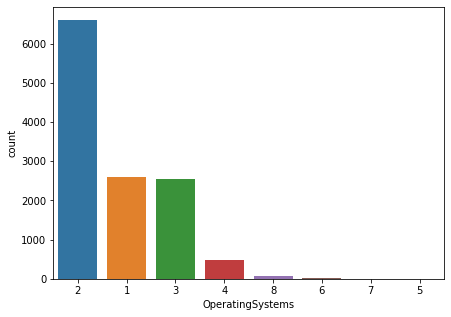

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(shopping['OperatingSystems'],order=data.OperatingSystems.value_counts().index)
# more number of users have OS 2

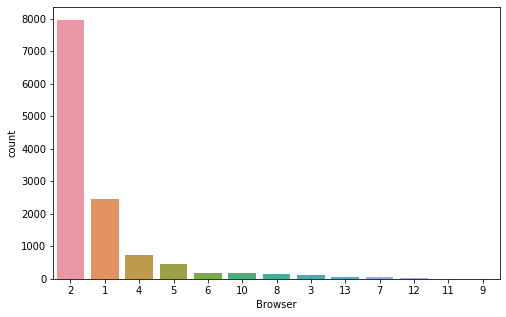

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(shopping['Browser'],order=data.Browser.value_counts().index)
# for Browsing the website, most number of users have opted for browser 2 (class label)

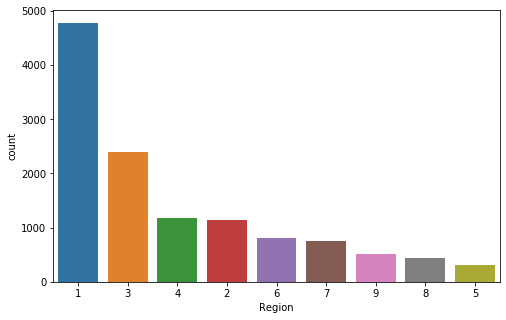

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(shopping['Region'],order=data.Region.value_counts().index)
# There are more numbers of users from region 1(class label)

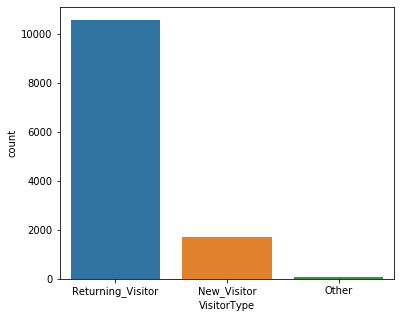

In [31]:
plt.figure(figsize=(6,5))
sns.countplot(shopping['VisitorType'],order=data.VisitorType.value_counts().index)
# most of the users are registred one
# new visters are very less

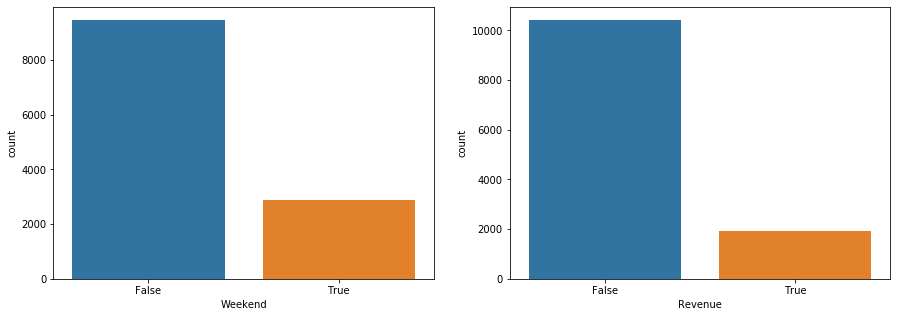

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(shopping['Weekend'])
plt.subplot(1, 2, 2)
sns.countplot(data['Revenue'])
## There are more number of users visit on weekdays rather than weekend

# b) Bivariate Analysis

In [33]:
# for 2- categorical feature we will use stacked bar graph
# check all the categorical features with target variable-Revenue

In [34]:
# we will check whether which visitor type are making more payment

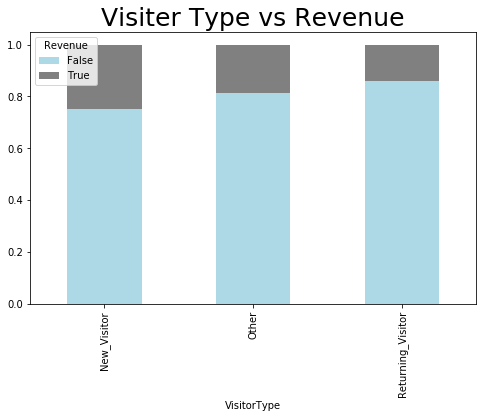

In [35]:
# visitor type Type vs Revenue

df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightblue', 'grey'])
plt.title('Visiter Type vs Revenue', fontsize = 25)
plt.show()

In [36]:
# There is more chance of transcation if it is a new user

In [37]:
# We will check weather the Revenue is more on the weekends or not

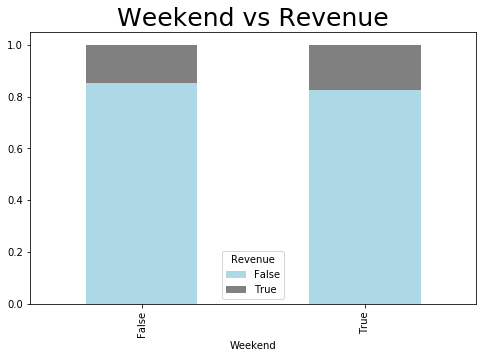

In [38]:
# Weekend Type vs Revenue

df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightblue', 'grey'])
plt.title('Weekend vs Revenue', fontsize = 25)
plt.show()

In [39]:
# # There is more chance of transcation on weekends

In [40]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

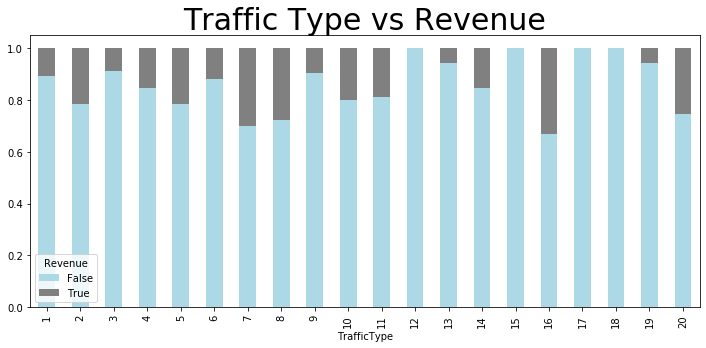

In [41]:
# Weekend Type vs Revenue

df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (12, 5), color = ['lightblue', 'grey'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

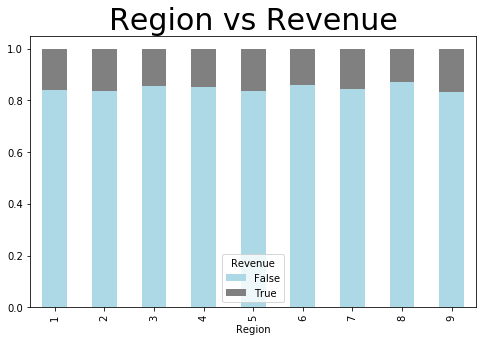

In [42]:
# Weekend Type vs Revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightblue', 'grey'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

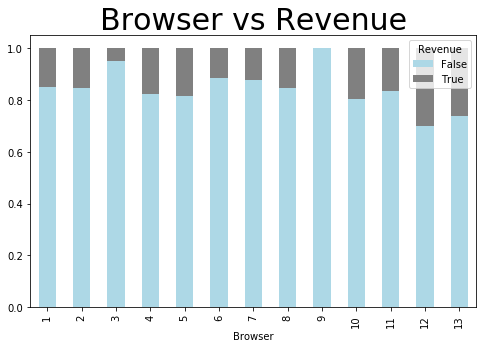

In [43]:
df = pd.crosstab(data['Browser'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightblue', 'grey'])
plt.title('Browser vs Revenue', fontsize = 30)
plt.show()

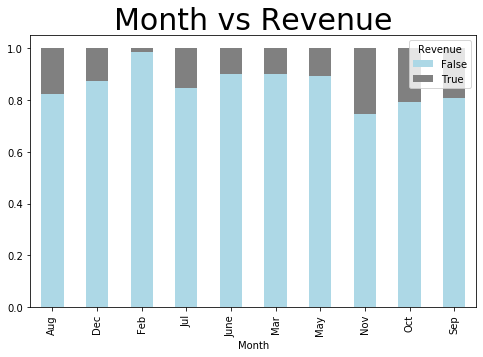

In [44]:
df = pd.crosstab(data['Month'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightblue', 'grey'])
plt.title('Month vs Revenue', fontsize = 30)
plt.show()

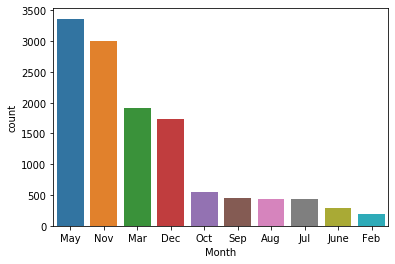

In [45]:
sns.countplot(shopping['Month'],order=['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'])

In [46]:
# In the month of  may users were more but trancation is less
# Whereas In the month of November 
# In the month of the 'Oct', 'Sep', 'Aug' users are less 

In [47]:
#Analysis of the Numerical columns with the Target Variable (categorical variable)
# We can use the boxplot or stripplot 

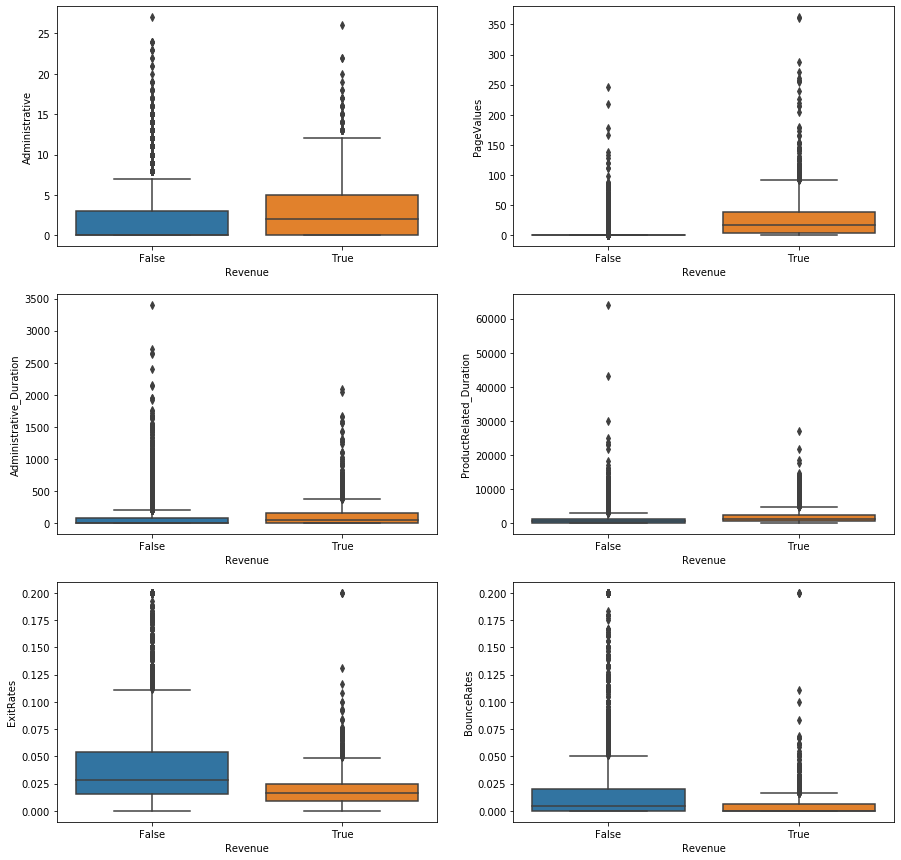

In [48]:
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.boxplot(x="Revenue", y="Administrative",data=shopping)
plt.subplot(3, 2, 2)
sns.boxplot(x="Revenue", y="PageValues",data=shopping)
plt.subplot(3, 2, 3)
sns.boxplot(x="Revenue", y="Administrative_Duration",data=shopping)

plt.subplot(3, 2, 4)
sns.boxplot(x="Revenue", y="ProductRelated_Duration",data=shopping)

plt.subplot(3, 2, 5)
sns.boxplot(x="Revenue", y="ExitRates",data=shopping)

plt.subplot(3, 2, 6)
sns.boxplot(x="Revenue", y="BounceRates",data=shopping)


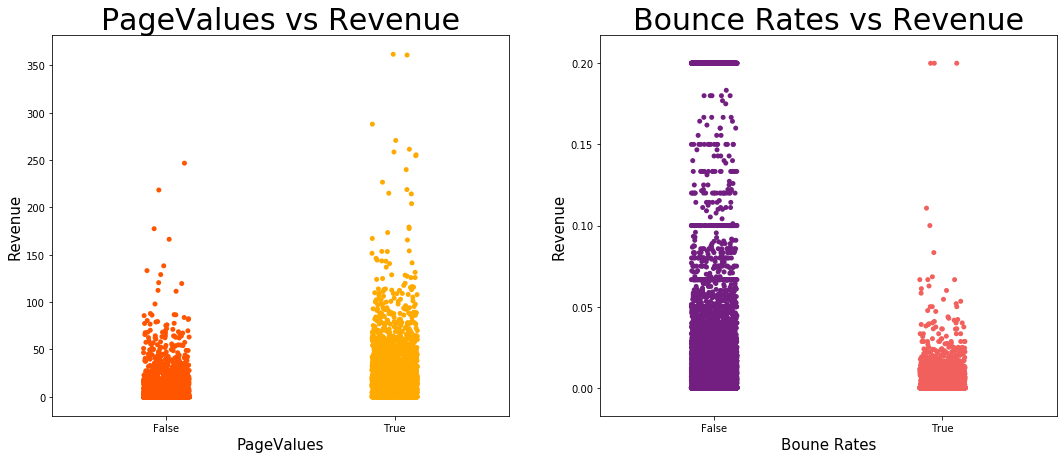

In [49]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(data['Revenue'], data['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

In [50]:
# for two Numerical Variables-ScatterPlot

In [51]:
Numerical_features

['Administrative',
 'Informational',
 'Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'TrafficType']

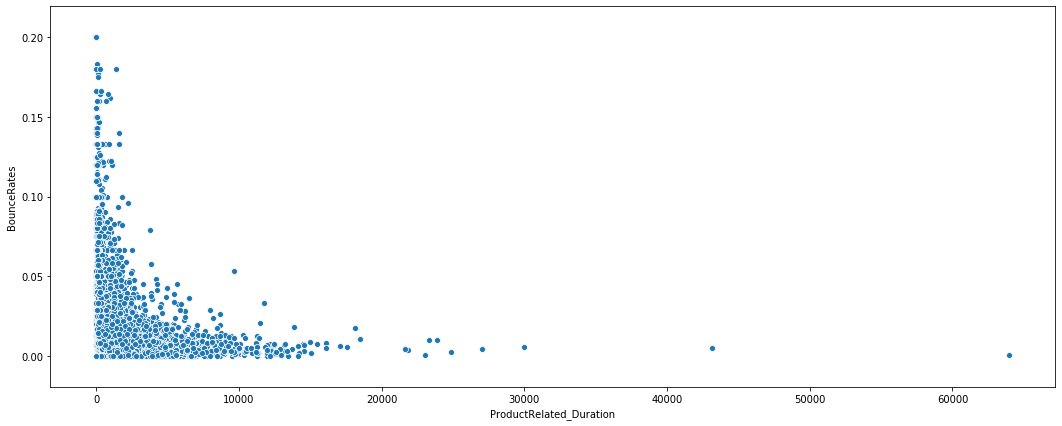

In [52]:
sns.scatterplot(data['ProductRelated_Duration'],data['BounceRates'])

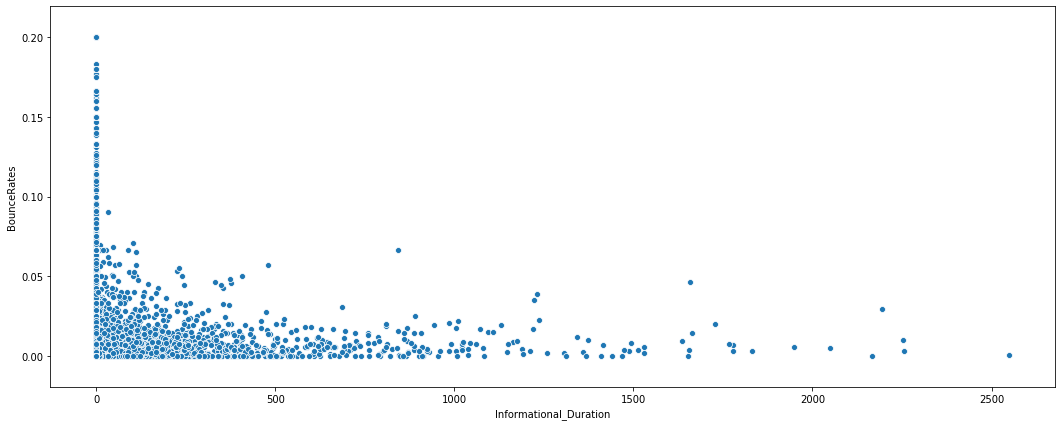

In [53]:
sns.scatterplot(data['Informational_Duration'],data['BounceRates'])

In [54]:
# Clustering Analysis

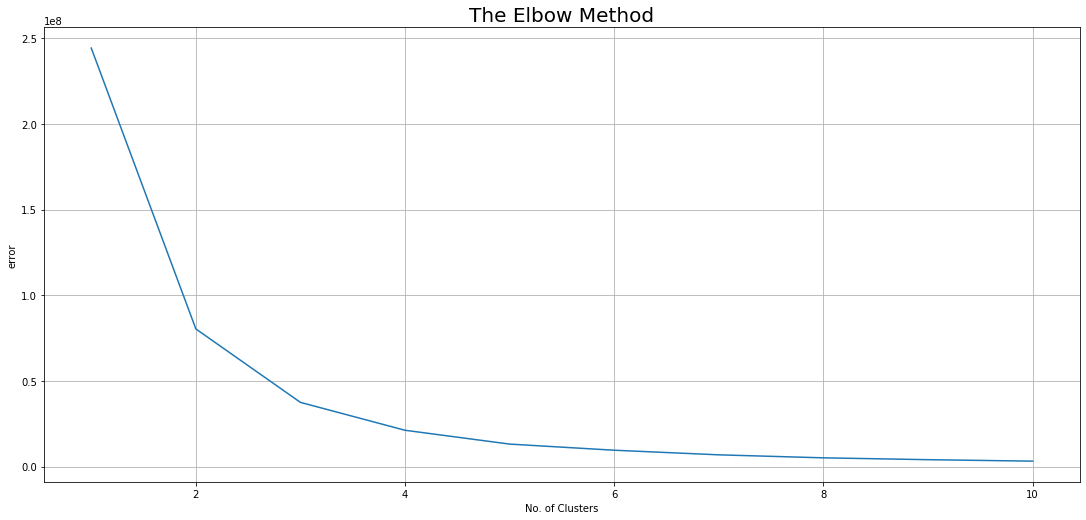

In [55]:
x=shopping.iloc[:, [3,6]].values
from sklearn.cluster import KMeans

error = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    error.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), error)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('error')
plt.show()

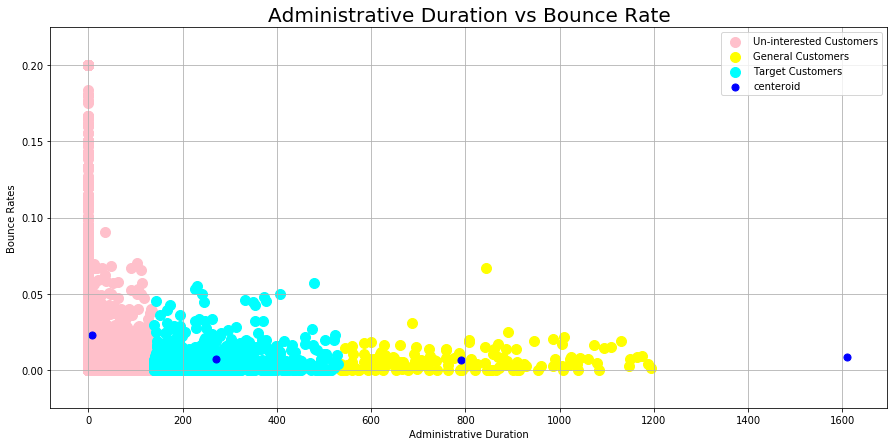

In [56]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

#### By, Looking at this Clustering plot, we can say confindently say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.


### There are Three Groups, The Pink Group is a group of customers who stay for shortest adminstrative duration and have highest chance for Navigating away from a website

In [57]:
col_list=['Administrative', 'Informational','Administrative_Duration',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'TrafficType','Revenue']

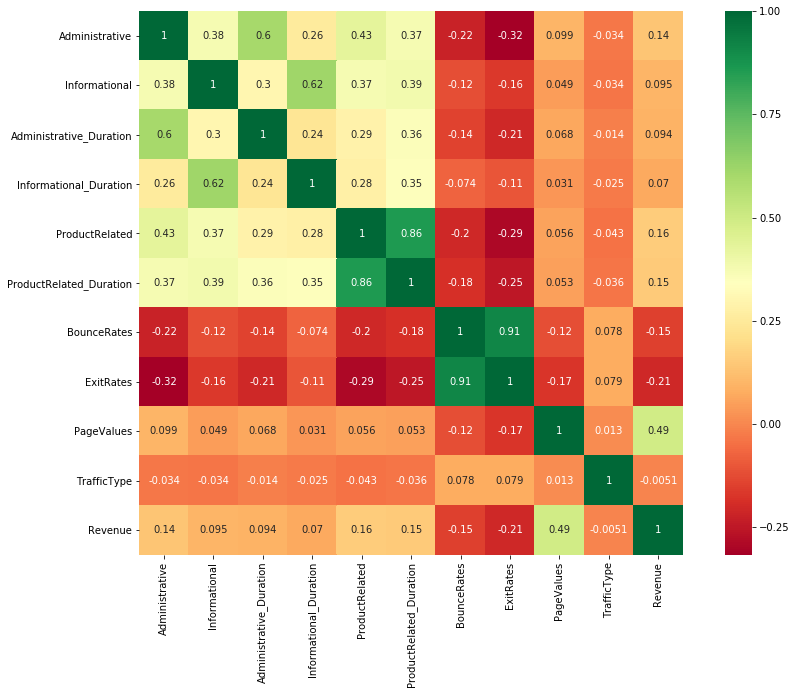

In [58]:

# for the numerical
plt.figure(figsize=(15,10))
p=sns.heatmap(shopping[col_list].corr(), annot=True,cmap='RdYlGn',square=True)

In [59]:
# We will do statistical test to check which one feature is significant for the target variable

# Data Preprocessing

In [60]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [61]:
 #one hot encoding 
dummies_data = pd.get_dummies(shopping)
# check the columns 
dummies_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [62]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dummies_data['Revenue'] = le.fit_transform(dummies_data['Revenue'])
# check the Revenue column
dummies_data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

# 3. Dataset splitting

In [63]:
# getting dependent and independent variables

x = dummies_data
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = dummies_data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


In [64]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


# 4. Modeling

In [65]:
# This is a classification problem because we need to predict the class labels for the revenue.
# It is binary classification problem because there are two labels in we need to predict.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))



# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8879619974510485
Testing Accuracy : 0.8753717220870506
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3077
           1       0.76      0.38      0.50       622

    accuracy                           0.88      3699
   macro avg       0.82      0.68      0.72      3699
weighted avg       0.86      0.88      0.86      3699



In [67]:
from sklearn.metrics import cohen_kappa_score
# cohen kappa show the predictive power of the model
cohen_kappa_score(y_test, y_pred)

0.4426181443060392

In [68]:
# accuracy is good but model is not able to recall the true category
# predictive power of the model is not good because cohhen kappa is not good
# we need to balance the data

In [69]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))



# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.991773838489167
Testing Accuracy : 0.8886185455528521
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3077
           1       0.75      0.50      0.60       622

    accuracy                           0.89      3699
   macro avg       0.83      0.74      0.77      3699
weighted avg       0.88      0.89      0.88      3699



### Issues in the model

# Statistical Tests 

In [70]:
df = shopping.copy()
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


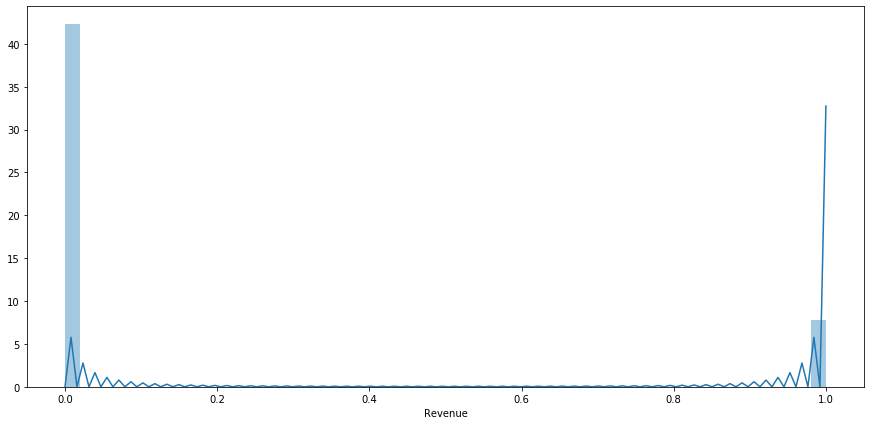

In [71]:
df['Revenue'] = df['Revenue'].replace({False: 'False', True: 'True'})
df['Revenue'] = df['Revenue'].replace({"False": 0, "True": 1})
df['Revenue'] = df['Revenue'].astype(int)
sns.distplot(df['Revenue'])

In [72]:
from scipy.stats import shapiro, f_oneway, ttest_ind, chi2_contingency

In [73]:
shapiro(df['Revenue'])

(0.4331520199775696, 0.0)

---------

In [74]:
ri = df[df['VisitorType'] == 'Returning_Visitor']['ExitRates']
rt = df[df['VisitorType'] == 'New_Visitor']['ExitRates']
rc = df[df['VisitorType'] == 'Other']['ExitRates']

In [75]:
f_oneway(ri, rt, rc)

F_onewayResult(statistic=221.166709631569, pvalue=4.282460054622956e-95)

In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [77]:
pairwise_tukeyhsd(df['ExitRates'], df['VisitorType'], alpha = 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
New_Visitor,Other,0.0427,0.001,0.0302,0.0551,True
New_Visitor,Returning_Visitor,0.0258,0.001,0.0229,0.0288,True
Other,Returning_Visitor,-0.0168,0.0034,-0.029,-0.0047,True


----

In [78]:
ri = df[df['VisitorType'] == 'Returning_Visitor']['BounceRates']
rt = df[df['VisitorType'] == 'New_Visitor']['BounceRates']
rc = df[df['VisitorType'] == 'Other']['BounceRates']

In [79]:
f_oneway(ri, rt, rc)

F_onewayResult(statistic=125.59707533017409, pvalue=1.0050903309806886e-54)

In [80]:
pairwise_tukeyhsd(df['BounceRates'], df['VisitorType'], alpha = 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
New_Visitor,Other,0.0333,0.001,0.0208,0.0458,True
New_Visitor,Returning_Visitor,0.0195,0.001,0.0166,0.0225,True
Other,Returning_Visitor,-0.0138,0.0229,-0.026,-0.0015,True


-------

In [81]:
ri = df[df['VisitorType'] == 'Returning_Visitor']['PageValues']
rt = df[df['VisitorType'] == 'New_Visitor']['PageValues']
rc = df[df['VisitorType'] == 'Other']['PageValues']

In [82]:
f_oneway(ri, rt, rc)

F_onewayResult(statistic=90.45482263934828, pvalue=1.0033303968830675e-39)

In [83]:
pairwise_tukeyhsd(df['PageValues'], df['VisitorType'], alpha = 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
New_Visitor,Other,7.4196,0.001,2.6165,12.2228,True
New_Visitor,Returning_Visitor,-5.766,0.001,-6.8971,-4.635,True
Other,Returning_Visitor,-13.1856,0.001,-17.8915,-8.4798,True


-----------

In [84]:
ra = df[df['Month'] == 'May']['PageValues']
rb = df[df['Month'] == 'Nov']['PageValues']
rc = df[df['Month'] == 'Mar']['PageValues']
rd = df[df['Month'] == 'Dec']['PageValues']
re = df[df['Month'] == 'Oct']['PageValues']
rf = df[df['Month'] == 'Sep']['PageValues']
rg = df[df['Month'] == 'Aug']['PageValues']
rh = df[df['Month'] == 'Jul']['PageValues']
ri = df[df['Month'] == 'June']['PageValues']
rj = df[df['Month'] == 'Feb']['PageValues']

In [85]:
f_oneway(ra, rb, rc, rd, re, rf, rg, rh, ri, rj)

F_onewayResult(statistic=8.796990472631139, pvalue=2.6212464572154173e-13)

In [86]:
pairwise_tukeyhsd(df['PageValues'], df['Month'], alpha = 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Aug,Dec,0.8952,0.9,-2.2537,4.0441,False
Aug,Feb,-5.0477,0.0611,-10.2037,0.1083,False
Aug,Jul,-1.8337,0.9,-5.8179,2.1506,False
Aug,June,-2.5466,0.7025,-7.0016,1.9084,False
Aug,Mar,-1.9784,0.5806,-5.0973,1.1406,False
Aug,May,-0.5065,0.9,-3.4979,2.4849,False
Aug,Nov,1.1913,0.9,-1.8208,4.2034,False
Aug,Oct,2.7075,0.4085,-1.0582,6.4732,False
Aug,Sep,1.6188,0.9,-2.3297,5.5672,False
Dec,Feb,-5.9429,0.0014,-10.4864,-1.3993,True


---

In [87]:
ra = df[df['Month'] == 'May']['BounceRates']
rb = df[df['Month'] == 'Nov']['BounceRates']
rc = df[df['Month'] == 'Mar']['BounceRates']
rd = df[df['Month'] == 'Dec']['BounceRates']
re = df[df['Month'] == 'Oct']['BounceRates']
rf = df[df['Month'] == 'Sep']['BounceRates']
rg = df[df['Month'] == 'Aug']['BounceRates']
rh = df[df['Month'] == 'Jul']['BounceRates']
ri = df[df['Month'] == 'June']['BounceRates']
rj = df[df['Month'] == 'Feb']['BounceRates']

In [88]:
f_oneway(ra, rb, rc, rd, re, rf, rg, rh, ri, rj)

F_onewayResult(statistic=18.255957105401702, pvalue=1.5571685144568384e-30)

In [89]:
pairwise_tukeyhsd(df['BounceRates'], df['Month'], alpha = 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Aug,Dec,0.0019,0.9,-0.0063,0.0101,False
Aug,Feb,0.0288,0.001,0.0154,0.0422,True
Aug,Jul,0.0065,0.6014,-0.0039,0.0168,False
Aug,June,0.0169,0.001,0.0053,0.0285,True
Aug,Mar,0.0035,0.9,-0.0046,0.0116,False
Aug,May,0.0087,0.0158,0.0009,0.0164,True
Aug,Nov,0.001,0.9,-0.0068,0.0089,False
Aug,Oct,-0.0064,0.5517,-0.0162,0.0034,False
Aug,Sep,-0.006,0.6733,-0.0163,0.0042,False
Dec,Feb,0.0269,0.001,0.015,0.0387,True


------

In [90]:
ra = df[df['Month'] == 'May']['ExitRates']
rb = df[df['Month'] == 'Nov']['ExitRates']
rc = df[df['Month'] == 'Mar']['ExitRates']
rd = df[df['Month'] == 'Dec']['ExitRates']
re = df[df['Month'] == 'Oct']['ExitRates']
rf = df[df['Month'] == 'Sep']['ExitRates']
rg = df[df['Month'] == 'Aug']['ExitRates']
rh = df[df['Month'] == 'Jul']['ExitRates']
ri = df[df['Month'] == 'June']['ExitRates']
rj = df[df['Month'] == 'Feb']['ExitRates']

In [91]:
f_oneway(ra, rb, rc, rd, re, rf, rg, rh, ri, rj)

F_onewayResult(statistic=30.43008726432431, pvalue=3.728543398341977e-53)

In [92]:
pairwise_tukeyhsd(df['ExitRates'], df['Month'], alpha = 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Aug,Dec,0.0036,0.9,-0.0046,0.0118,False
Aug,Feb,0.0364,0.001,0.023,0.0498,True
Aug,Jul,0.0076,0.3742,-0.0027,0.018,False
Aug,June,0.0205,0.001,0.0089,0.0321,True
Aug,Mar,0.0069,0.1794,-0.0012,0.015,False
Aug,May,0.0111,0.001,0.0034,0.0189,True
Aug,Nov,0.0005,0.9,-0.0073,0.0083,False
Aug,Oct,-0.0087,0.1292,-0.0185,0.0011,False
Aug,Sep,-0.0074,0.4013,-0.0177,0.0028,False
Dec,Feb,0.0328,0.001,0.021,0.0446,True


--------

In [93]:
numerical_features = df.drop(['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'VisitorType', 'Weekend', 
                              'Revenue'], axis = 1)
categorical_features = df.drop(['Administrative', 'Informational','Administrative_Duration', 'Informational_Duration', 
                                'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 
                                'TrafficType'], axis = 1)

In [94]:
for i in numerical_features:
    print(i)
    print(ttest_ind(df[i], df['Revenue']))
    print()

Administrative
Ttest_indResult(statistic=71.79423409134735, pvalue=0.0)

Administrative_Duration
Ttest_indResult(statistic=50.66741239721269, pvalue=0.0)

Informational
Ttest_indResult(statistic=29.32927920342698, pvalue=6.829583291381449e-186)

Informational_Duration
Ttest_indResult(statistic=27.0739399767082, pvalue=4.2317316568884093e-159)

ProductRelated
Ttest_indResult(statistic=78.83396511441096, pvalue=0.0)

ProductRelated_Duration
Ttest_indResult(statistic=69.31608966567282, pvalue=0.0)

BounceRates
Ttest_indResult(statistic=-40.33518525472262, pvalue=0.0)

ExitRates
Ttest_indResult(statistic=-33.979745559651704, pvalue=2.239395433249529e-247)

PageValues
Ttest_indResult(statistic=34.286282398549886, pvalue=1.0171760791556384e-251)

TrafficType
Ttest_indResult(statistic=107.56364016969864, pvalue=0.0)



-----

In [95]:
for i in categorical_features:
    table = pd.crosstab(df['Revenue'], df[i])
    print(i)
    print(chi2_contingency(table))
    print()
    

SpecialDay
(96.07690626757704, 3.5432443403841987e-19, 5, array([[9364.58540146,  150.45547445,  205.39708029,  296.68467153,
         274.7080292 ,  130.16934307],
       [1714.41459854,   27.54452555,   37.60291971,   54.31532847,
          50.2919708 ,   23.83065693]]))

Month
(384.93476153599426, 2.2387855164805443e-77, 9, array([[ 365.99562044, 1459.75620438,  155.5270073 ,  365.15036496,
         243.43357664, 1611.90218978, 2843.43941606, 2534.07591241,
         464.04525547,  378.67445255],
       [  67.00437956,  267.24379562,   28.4729927 ,   66.84963504,
          44.56642336,  295.09781022,  520.56058394,  463.92408759,
          84.95474453,   69.32554745]]))

OperatingSystems
(75.02705620298461, 1.4160941129614507e-13, 7, array([[2.18498540e+03, 5.57953139e+03, 2.15962774e+03, 4.04032117e+02,
        5.07153285e+00, 1.60598540e+01, 5.91678832e+00, 6.67751825e+01],
       [4.00014599e+02, 1.02146861e+03, 3.95372263e+02, 7.39678832e+01,
        9.28467153e-01, 2.94014599e+0

-----------------

# Model Evaluation

In [4]:
df = pd.read_csv('online_shoppers_intention.csv')
df1 = pd.get_dummies(df)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])

In [6]:
x = df1.drop(['Revenue'], axis = 1)
y = df1['Revenue']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


In [8]:
from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

7273
7273


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix, mean_squared_error

In [11]:

from sklearn.feature_selection import SelectKBest,chi2
bestFeatures = SelectKBest(score_func=chi2, k = 10)
fit = bestFeatures.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs','Score']

featureScores.nlargest(10, 'Score')


,Specs,Score
5,ProductRelated_Duration,877404.339415
8,PageValues,175126.808512
1,Administrative_Duration,41754.836841
3,Informational_Duration,35059.775770
4,ProductRelated,19317.285376
0,Administrative,1133.965531
2,Informational,357.981605
22,Month_Nov,223.548231
25,VisitorType_New_Visitor,115.339482
21,Month_May,54.997108


In [13]:
x = df1.drop(['BounceRates', 'ExitRates','SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
        'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar','Month_Oct',
       'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Revenue'], axis =1)
y = df1['Revenue']

In [14]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(xtrain_reset, ytrain_reset)
lor_pred = lor.predict(xtest_reset)

print("Accuracy score is ",accuracy_score(ytest_reset,lor_pred))
print("Cohen Cappa score is",cohen_kappa_score(ytest_reset,lor_pred))
print("Training Accuracy :", lor.score(xtrain_reset,ytrain_reset))
print("Testing Accuracy :", lor.score(xtest_reset, ytest_reset))
print(classification_report(ytest_reset,lor_pred))

confusion = confusion_matrix(ytest_reset, lor_pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

precision_lor = TP / float(TP + FP)
sensitivity_lor = TP / float(FN + TP)

rmse_lor = np.sqrt(mean_squared_error(ytest_reset, lor_pred))


df2 = pd.DataFrame({'Model': ['Logistic Regression'],
                    'Accuracy Score': [accuracy_score(ytest_reset,lor_pred)],
                    'Recall': [sensitivity_lor],
                    'Precision': [precision_lor],
                    'Kappa Score':  [cohen_kappa_score(ytest_reset,lor_pred)],
                    'Training Score':  [lor.score(xtrain_reset,ytrain_reset)],
                    'Test Score':[lor.score(xtest_reset, ytest_reset)],
                    'RMSE': [rmse_lor]
                   })
df2


Accuracy score is  0.8582089552238806
Cohen Cappa score is 0.7164179104477613
Training Accuracy : 0.8394060222741647
Testing Accuracy : 0.8582089552238806
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3149
           1       0.88      0.83      0.85      3149

    accuracy                           0.86      6298
   macro avg       0.86      0.86      0.86      6298
weighted avg       0.86      0.86      0.86      6298

[[2781  368]
 [ 525 2624]]


,Model,Accuracy Score,Recall,Precision,Kappa Score,Training Score,Test Score,RMSE
0,Logistic Regression,0.858209,0.83328,0.877005,0.716418,0.839406,0.858209,0.376552


In [15]:
## USING Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_reset, ytrain_reset)
nb_pred = gnb.predict(xtest_reset)

print("Accuracy score is ",accuracy_score(ytest_reset,nb_pred))
print("Cohen Cappa score is",cohen_kappa_score(ytest_reset,nb_pred))
print("Training Accuracy :", gnb.score(xtrain_reset,ytrain_reset))
print("Testing Accuracy :", gnb.score(xtest_reset, ytest_reset))
print(classification_report(ytest_reset,nb_pred))

confusion = confusion_matrix(ytest_reset, nb_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

precision_nb = TP / float(TP + FP)

## USING FORMULA
sensitivity_nb = TP / float(FN + TP)

rmse_nb = np.sqrt(mean_squared_error(ytest_reset, nb_pred))

df2 = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes'],
                    'Accuracy Score': [accuracy_score(ytest_reset,lor_pred), accuracy_score(ytest_reset,nb_pred)],
                    'Recall': [sensitivity_lor, sensitivity_nb],
                    'Precision': [precision_lor, precision_nb],
                    'Kappa Score':  [cohen_kappa_score(ytest_reset,lor_pred), cohen_kappa_score(ytest_reset,nb_pred)],
                    'Training Score':  [lor.score(xtrain_reset,ytrain_reset), gnb.score(xtrain_reset,ytrain_reset)],
                    'Test Score':[lor.score(xtest_reset, ytest_reset), gnb.score(xtest_reset, ytest_reset)],
                    'RMSE': [rmse_lor, rmse_nb]
                   })
df2

Accuracy score is  0.7048269291838679
Cohen Cappa score is 0.4096538583677358
Training Accuracy : 0.7061047710710848
Testing Accuracy : 0.7048269291838679
              precision    recall  f1-score   support

           0       0.86      0.49      0.62      3149
           1       0.64      0.92      0.76      3149

    accuracy                           0.70      6298
   macro avg       0.75      0.70      0.69      6298
weighted avg       0.75      0.70      0.69      6298

[[1530 1619]
 [ 240 2909]]


,Model,Accuracy Score,Recall,Precision,Kappa Score,Training Score,Test Score,RMSE
0,Logistic Regression,0.858209,0.833280,0.877005,0.716418,0.839406,0.858209,0.376552
1,Naive Bayes,0.704827,0.923785,0.642447,0.409654,0.706105,0.704827,0.543298


In [142]:
x = df1.drop(['Revenue'], axis = 1)
y = df1['Revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

## Applying SMOTE

from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)
7273
7273


[4.24124989e-02 5.36669113e-02 1.90787778e-02 2.56696681e-02
 7.28054019e-02 9.52778424e-02 5.67203620e-02 7.47544136e-02
 3.67018570e-01 4.46963474e-03 1.75211583e-02 2.06849129e-02
 3.08986069e-02 3.27197917e-02 1.00937945e-02 3.32508706e-03
 5.77538732e-03 7.85072049e-05 3.53454394e-03 2.93759159e-03
 5.04444962e-03 6.68167790e-03 2.09575985e-02 3.32824027e-03
 3.85845027e-03 8.92460987e-03 4.87557026e-04 1.12739548e-02]


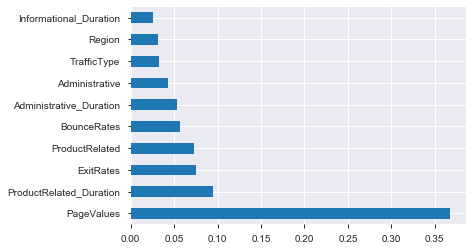

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain_reset,ytrain_reset)
rf.fit(x,y)
print(rf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [144]:
x = df1.drop(['Informational','SpecialDay',
       'OperatingSystems', 'Browser', 'Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Revenue'], axis = 1)
y = df1['Revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Applying SMOTE

from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain_reset,ytrain_reset)
rf_pred = rf.predict(xtest_reset)

print("Accuracy score is ",accuracy_score(ytest_reset,rf_pred))
print("Cohen Cappa score is",cohen_kappa_score(ytest_reset,rf_pred))
print("Training Accuracy :", rf.score(xtrain_reset,ytrain_reset))
print("Testing Accuracy :", rf.score(xtest_reset, ytest_reset))
print(classification_report(ytest_reset,rf_pred))
confusion = confusion_matrix(ytest_reset, rf_pred)
print(confusion)


7273
7273
Accuracy score is  0.8974277548428072
Cohen Cappa score is 0.7948555096856145
Training Accuracy : 0.9950501856180394
Testing Accuracy : 0.8974277548428072
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3149
           1       0.92      0.87      0.89      3149

    accuracy                           0.90      6298
   macro avg       0.90      0.90      0.90      6298
weighted avg       0.90      0.90      0.90      6298

[[2911  238]
 [ 408 2741]]


In [145]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain_reset,ytrain_reset)
rf_pred = rf.predict(xtest_reset)

n_estimators = [x for x in range(1,10)]
max_depth = [4, 5, 6, 7, 8]
min_samples_split = [x for x in range(2,8)]
min_samples_leaf = [x for x in range(1,8)] 
criterion = ['gini', 'entropy']


hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf, criterion = criterion)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(xtrain_reset,ytrain_reset)

Fitting 3 folds for each of 3780 candidates, totalling 11340 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 1546 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 2946 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 4746 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6946 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 9546 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 11340 out of 11340 | elapsed:  3.2min finished


In [146]:
bestF.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 9}

In [147]:
bestF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
bestF.best_score_

0.9128282689399148

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=9)
rf.fit(xtrain_reset,ytrain_reset)
rf_pred = rf.predict(xtest_reset)

print("Accuracy score is ",accuracy_score(ytest_reset,rf_pred))
print("Cohen Cappa score is",cohen_kappa_score(ytest_reset,rf_pred))
print("Training Accuracy :", rf.score(xtrain_reset,ytrain_reset))
print("Testing Accuracy :", rf.score(xtest_reset, ytest_reset))
print(classification_report(ytest_reset,rf_pred))

confusion = confusion_matrix(ytest_reset, rf_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

precision_rf = TP / float(TP + FP)
print(precision_rf)

sensitivity_rf = TP / float(FN + TP)
print(sensitivity_rf)

rmse_rf = np.sqrt(mean_squared_error(ytest_reset, rf_pred))
rmse_rf

df2 = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest Classifier'],
                    'Accuracy Score': [0.852652, 0.763099, accuracy_score(ytest_reset,rf_pred)],
                    'Recall': [0.804065, 0.638298, sensitivity_rf],
                    'Precision': [0.890609, 0.850614, precision_rf],
                    'Kappa Score':  [0.705303, 0.526199, cohen_kappa_score(ytest_reset, rf_pred)],
                    'Training Score':  [0.835006, 0.745910, rf.score(xtrain_reset,ytrain_reset)],
                    'Test Score':[0.852652, 0.763099, rf.score(xtest_reset, ytest_reset)],
                    'RMSE': [0.383860, 0.486724, rmse_rf]
                   })
df2

Accuracy score is  0.9013972689742775
Cohen Cappa score is 0.802794537948555
Training Accuracy : 0.9192905266052523
Testing Accuracy : 0.9013972689742775
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3149
           1       0.89      0.91      0.90      3149

    accuracy                           0.90      6298
   macro avg       0.90      0.90      0.90      6298
weighted avg       0.90      0.90      0.90      6298

[[2804  345]
 [ 276 2873]]
0.8927905531385955
0.9123531279771356


,Model,Accuracy Score,Recall,Precision,Kappa Score,Training Score,Test Score,RMSE
0,Logistic Regression,0.852652,0.804065,0.890609,0.705303,0.835006,0.852652,0.383860
1,Naive Bayes,0.763099,0.638298,0.850614,0.526199,0.745910,0.763099,0.486724
2,Random Forest Classifier,0.901397,0.912353,0.892791,0.802795,0.919291,0.901397,0.314011


In [150]:
x = df1.drop(['Revenue'], axis = 1)
y = df1['Revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

## Applying SMOTE

from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)
7273
7273


[0.04136524 0.05228964 0.01091006 0.02355625 0.06423102 0.07709431
 0.08368967 0.06761745 0.41645913 0.00364824 0.01775971 0.01689453
 0.03485172 0.02212525 0.01017494 0.00201424 0.00397978 0.00101602
 0.0014721  0.00155048 0.00515367 0.00449746 0.02492648 0.00276462
 0.00198204 0.00327023 0.00105924 0.00364648]


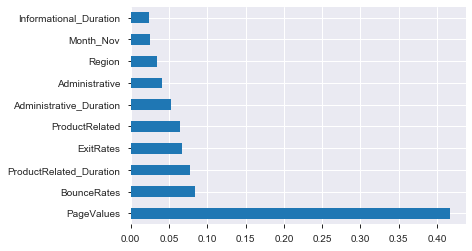

In [115]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(xtrain_reset,ytrain_reset)
dtree.fit(x,y)
print(dtree.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(dtree.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [116]:
x = df1.drop(['Informational','SpecialDay',
       'OperatingSystems', 'Browser', 'Weekend', 'TrafficType', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May',  'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Revenue'], axis = 1)
y = df1['Revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Applying SMOTE

from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(xtrain_reset,ytrain_reset)
dtree_pred = dtree.predict(xtest_reset)

print("Accuracy score is ",accuracy_score(ytest_reset,dtree_pred))
print("Cohen Cappa score is",cohen_kappa_score(ytest_reset,dtree_pred))
print("Training Accuracy :", dtree.score(xtrain_reset,ytrain_reset))
print("Testing Accuracy :", dtree.score(xtest_reset, ytest_reset))
print(classification_report(ytest_reset,dtree_pred))


7273
7273
Accuracy score is  0.8577326135281041
Cohen Cappa score is 0.7154652270562083
Training Accuracy : 0.9998625051560567
Testing Accuracy : 0.8577326135281041
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3149
           1       0.88      0.82      0.85      3149

    accuracy                           0.86      6298
   macro avg       0.86      0.86      0.86      6298
weighted avg       0.86      0.86      0.86      6298



In [117]:
def decision_tree():
    from sklearn import tree
    from sklearn.model_selection import GridSearchCV, cross_val_score
    from sklearn.pipeline import Pipeline

    decisiontree = tree.DecisionTreeClassifier()

    pipe = Pipeline(steps=[('sc', sc),
                           ('decisiontree', decisiontree)])

    n_components = list(range(1,7))

    criterion = ['gini', 'entropy']
    max_depth = [1,2,3,4,5]

    parameters = dict(decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

    clf = GridSearchCV(pipe, parameters)

    clf.fit(xtrain_reset,ytrain_reset)

    print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
    print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
    print(clf.best_estimator_.get_params()['decisiontree'])



decision_tree()


Best Criterion: entropy
Best max_depth: 3
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [120]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(xtrain_reset,ytrain_reset)
dtree_pred = dtree.predict(xtest_reset)

print("Accuracy score is ",accuracy_score(ytest_reset,dtree_pred))
print("Cohen Cappa score is",cohen_kappa_score(ytest_reset,dtree_pred))
print("Training Accuracy :", dtree.score(xtrain_reset,ytrain_reset))
print("Testing Accuracy :", dtree.score(xtest_reset, ytest_reset))
print(classification_report(ytest_reset,dtree_pred))

confusion = confusion_matrix(ytest_reset, dtree_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

precision_dtree = TP / float(TP + FP)
print(precision_dtree)

## USING FORMULA
sensitivity_dtree = TP / float(FN + TP)
print(sensitivity_dtree)

rmse_dtree = np.sqrt(mean_squared_error(ytest_reset, dtree_pred))
rmse_dtree
df2 = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest Classifier', 'Decision Tree'],
                    'Accuracy Score': [0.852652, 0.763099, 0.895205,accuracy_score(ytest_reset,dtree_pred)],
                    'Recall': [0.804065, 0.638298, 0.901238,sensitivity_dtree],
                    'Precision': [0.890609, 0.850614, 0.890493,precision_dtree],
                    'Kappa Score':  [0.705303, 0.526199, 0.790410,cohen_kappa_score(ytest_reset, dtree_pred)],
                    'Training Score':  [0.835006, 0.745910, 0.920115,dtree.score(xtrain_reset,ytrain_reset)],
                    'Test Score':[0.852652, 0.763099, 0.895205,dtree.score(xtest_reset, ytest_reset)],
                    'RMSE': [0.383860, 0.486724, 0.323721,rmse_dtree]
                   })
df2


Accuracy score is  0.8990155604953953
Cohen Cappa score is 0.7980311209907908
Training Accuracy : 0.9085659287776708
Testing Accuracy : 0.8990155604953953
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3149
           1       0.88      0.92      0.90      3149

    accuracy                           0.90      6298
   macro avg       0.90      0.90      0.90      6298
weighted avg       0.90      0.90      0.90      6298

[[2769  380]
 [ 256 2893]]
0.8838985640085548
0.9187043505874881


,Model,Accuracy Score,Recall,Precision,Kappa Score,Training Score,Test Score,RMSE
0,Logistic Regression,0.852652,0.804065,0.890609,0.705303,0.835006,0.852652,0.383860
1,Naive Bayes,0.763099,0.638298,0.850614,0.526199,0.745910,0.763099,0.486724
2,Random Forest Classifier,0.895205,0.901238,0.890493,0.790410,0.920115,0.895205,0.323721
3,Decision Tree,0.899016,0.918704,0.883899,0.798031,0.908566,0.899016,0.317780


Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)
7273
7273
[0.04 0.02 0.   0.   0.06 0.1  0.06 0.16 0.18 0.02 0.   0.02 0.04 0.1
 0.   0.02 0.   0.02 0.02 0.   0.02 0.02 0.02 0.02 0.02 0.   0.   0.04]


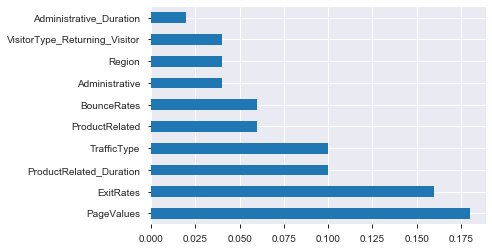

In [121]:
x = df1.drop(['Revenue'], axis = 1)
y = df1['Revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

## Applying SMOTE

from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
adab.fit(xtrain_reset,ytrain_reset)
adab.fit(x,y)
print(adab.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(adab.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [123]:
x = df1.drop(['Informational', 'Informational_Duration', 'Revenue', 'SpecialDay',
       'OperatingSystems', 'Browser','Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',], axis = 1)
y = df1['Revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Applying SMOTE

from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)

from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()

pred_adab = adab.fit(xtrain_reset, ytrain_reset).predict(xtest_reset)

print("The Accuracy Score is",accuracy_score(ytest_reset,pred_adab))
print("The Kappa Score is",cohen_kappa_score(ytest_reset,pred_adab))
print("Training Accuracy :", adab.score(xtrain_reset,ytrain_reset))
print("Testing Accuracy :", adab.score(xtest_reset, ytest_reset))
print(classification_report(ytest_reset,pred_adab))

confusion = confusion_matrix(ytest_reset, pred_adab)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

precision_adab = TP / float(TP + FP)
print(precision_adab)

sensitivity_adab = TP / float(FN + TP)
print(sensitivity_adab)

rmse_adab = np.sqrt(mean_squared_error(ytest_reset, pred_adab))
rmse_adab

df2 = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest Classifier', 'Decision Tree', 'Ada Boosting'],
                    'Accuracy Score': [0.852652, 0.763099, 0.895205, 0.899016,accuracy_score(ytest_reset,pred_adab)],
                    'Recall': [0.804065, 0.638298, 0.901238, 0.918704,sensitivity_adab],
                    'Precision': [0.890609, 0.850614, 0.890493, 0.883899,precision_adab],
                    'Kappa Score':  [0.705303, 0.526199, 0.790410, 0.798031,cohen_kappa_score(ytest_reset, pred_adab)],
                    'Training Score':  [0.835006, 0.745910, 0.920115, 0.908566,adab.score(xtrain_reset,ytrain_reset)],
                    'Test Score':[0.852652, 0.763099, 0.895205, 0.899016,adab.score(xtest_reset, ytest_reset)],
                    'RMSE': [0.383860, 0.486724, 0.323721, 0.317780,rmse_adab]
                   })
df2


7273
7273
The Accuracy Score is 0.9045728802794538
The Kappa Score is 0.8091457605589076
Training Accuracy : 0.9139282276914615
Testing Accuracy : 0.9045728802794538
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3149
           1       0.89      0.92      0.91      3149

    accuracy                           0.90      6298
   macro avg       0.91      0.90      0.90      6298
weighted avg       0.91      0.90      0.90      6298

[[2792  357]
 [ 244 2905]]
0.8905579399141631
0.9225150841536995


,Model,Accuracy Score,Recall,Precision,Kappa Score,Training Score,Test Score,RMSE
0,Logistic Regression,0.852652,0.804065,0.890609,0.705303,0.835006,0.852652,0.383860
1,Naive Bayes,0.763099,0.638298,0.850614,0.526199,0.745910,0.763099,0.486724
2,Random Forest Classifier,0.895205,0.901238,0.890493,0.790410,0.920115,0.895205,0.323721
3,Decision Tree,0.899016,0.918704,0.883899,0.798031,0.908566,0.899016,0.317780
4,Ada Boosting,0.904573,0.922515,0.890558,0.809146,0.913928,0.904573,0.308913


Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)
7273
7273
[2.49804779e-02 1.38165169e-02 1.83596724e-03 3.25940964e-03
 2.28192343e-02 2.61430414e-02 3.99702743e-02 2.60293524e-02
 7.60405287e-01 5.24755525e-04 6.72898320e-04 1.19059657e-03
 1.83177377e-03 4.43503980e-03 5.32707003e-04 2.13149631e-04
 7.61376824e-04 0.00000000e+00 2.24484420e-04 1.21397602e-03
 4.49530982e-03 7.56438178e-03 4.49523509e-02 2.38665961e-04
 1.26969403e-03 2.99920288e-03 0.00000000e+00 7.62007531e-03]


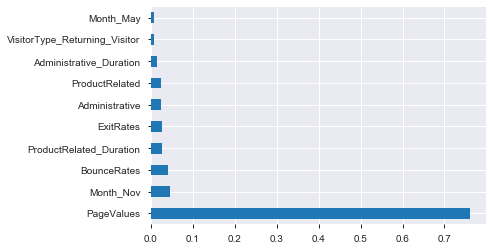

In [124]:
x = df1.drop(['Revenue'], axis = 1)
y = df1['Revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

## Applying SMOTE

from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(xtrain_reset,ytrain_reset)
gbm.fit(x,y)
print(gbm.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(gbm.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [126]:
x = df1.drop(['Revenue', 'Informational',
       'Informational_Duration', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',], axis = 1)
y = df1['Revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Applying SMOTE

from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)

from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

pred_gbm = gbm.fit(xtrain_reset, ytrain_reset).predict(xtest_reset)

print("The Accuracy Score is",accuracy_score(ytest_reset,pred_gbm))
print("The Kappa Score is",cohen_kappa_score(ytest_reset,pred_gbm))
print("Training Accuracy :", gbm.score(xtrain_reset,ytrain_reset))
print("Testing Accuracy :", gbm.score(xtest_reset, ytest_reset))
print(classification_report(ytest_reset,pred_gbm))

confusion = confusion_matrix(ytest_reset, pred_gbm)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

precision_gbm = TP / float(TP + FP)
print(precision_gbm)

sensitivity_gbm = TP / float(FN + TP)
print(sensitivity_gbm)

rmse_gbm = np.sqrt(mean_squared_error(ytest_reset, pred_gbm))
rmse_gbm
df2 = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest Classifier', 'Decision Tree', 'Ada Boosting', 'Gradient Boosting'],
                    'Accuracy Score': [0.852652, 0.763099, 0.895205, 0.899016, 0.904573,accuracy_score(ytest_reset,pred_gbm)],
                    'Recall': [0.804065, 0.638298, 0.901238, 0.918704, 0.922515,sensitivity_gbm],
                    'Precision': [0.890609, 0.850614, 0.890493, 0.883899, 0.890558,precision_gbm],
                    'Kappa Score':  [0.705303, 0.526199, 0.790410, 0.798031, 0.809146,cohen_kappa_score(ytest_reset, pred_gbm)],
                    'Training Score':  [0.835006, 0.745910, 0.920115, 0.908566, 0.913928,gbm.score(xtrain_reset,ytrain_reset)],
                    'Test Score':[0.852652, 0.763099, 0.895205, 0.899016, 0.904573,gbm.score(xtest_reset, ytest_reset)],
                    'RMSE': [0.383860, 0.486724, 0.323721, 0.317780, 0.308913,rmse_gbm]
                   })

df2


7273
7273
The Accuracy Score is 0.9207684979358527
The Kappa Score is 0.8415369958717053
Training Accuracy : 0.9313213254502957
Testing Accuracy : 0.9207684979358527
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3149
           1       0.92      0.92      0.92      3149

    accuracy                           0.92      6298
   macro avg       0.92      0.92      0.92      6298
weighted avg       0.92      0.92      0.92      6298

[[2893  256]
 [ 243 2906]]
0.9190385831752056
0.9228326452842172


,Model,Accuracy Score,Recall,Precision,Kappa Score,Training Score,Test Score,RMSE
0,Logistic Regression,0.852652,0.804065,0.890609,0.705303,0.835006,0.852652,0.383860
1,Naive Bayes,0.763099,0.638298,0.850614,0.526199,0.745910,0.763099,0.486724
2,Random Forest Classifier,0.895205,0.901238,0.890493,0.790410,0.920115,0.895205,0.323721
3,Decision Tree,0.899016,0.918704,0.883899,0.798031,0.908566,0.899016,0.317780
4,Ada Boosting,0.904573,0.922515,0.890558,0.809146,0.913928,0.904573,0.308913
5,Gradient Boosting,0.920768,0.922833,0.919039,0.841537,0.931321,0.920768,0.281481


Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)
7273
7273
[0.03564584 0.0174468  0.00668537 0.01200439 0.03055229 0.025863
 0.06304824 0.02948234 0.41027054 0.00762506 0.0078814  0.00645894
 0.00555917 0.01138645 0.00923084 0.00661979 0.01370424 0.0052227
 0.01363728 0.         0.04285364 0.05531566 0.07018686 0.
 0.01711254 0.0213375  0.         0.07486912]


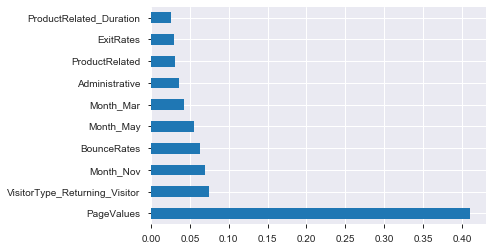

In [127]:
x = df1.drop(['Revenue'], axis = 1)
y = df1['Revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

## Applying SMOTE

from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain_reset,ytrain_reset)
xgb.fit(x,y)
print(xgb.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(xgb.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [129]:
df1.shape

(12330, 29)

In [128]:
df1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [130]:
x = df1.drop(['Revenue', 'Administrative_Duration','Informational',
       'Informational_Duration', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June','Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other'], axis = 1)
y = df1['Revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Applying SMOTE

from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain_reset = sc.fit_transform(xtrain_reset)
xtest_reset = sc.transform(xtest_reset)
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgbparams = {'booster':['gbtree', 'gblinear', 'dart'], 'max_depth' : [3,4,5,6], 'learning_rate' : [0.1, 0.3, 0.5], 
            'n_estimators' : [x for x in range(1,10)]}

grid = GridSearchCV(estimator=xgb, param_grid= xgbparams, cv = 5)

pred_xgb = grid.fit(xtrain_reset, ytrain_reset).predict(xtest_reset)


7273
7273


In [131]:
grid.best_params_

{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 7}

In [132]:
grid.best_score_

0.9211467069984876

In [133]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=7, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [134]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=6, n_estimators=7)
pred_xgb = xgb.fit(xtrain_reset, ytrain_reset).predict(xtest_reset)

print("The Accuracy Score is",accuracy_score(ytest_reset,pred_xgb))
print("The Kappa Score is",cohen_kappa_score(ytest_reset,pred_xgb))
print("Training Accuracy :", xgb.score(xtrain_reset,ytrain_reset))
print("Testing Accuracy :", xgb.score(xtest_reset, ytest_reset))
print(classification_report(ytest_reset,pred_xgb))

confusion = confusion_matrix(ytest_reset, pred_xgb)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

precision_xgb = TP / float(TP + FP)
print(precision_xgb)

sensitivity_xgb = TP / float(FN + TP)
print(sensitivity_xgb)

rmse_xgb = np.sqrt(mean_squared_error(ytest_reset, pred_xgb))
rmse_xgb

df2 = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest Classifier', 'Decision Tree', 'Ada Boosting', 'Gradient Boosting', 'XG Boost'],
                    'Accuracy Score': [0.852652, 0.763099, 0.895205, 0.899016, 0.904573, 0.920768,accuracy_score(ytest_reset,pred_xgb)],
                    'Recall': [0.804065, 0.638298, 0.901238, 0.918704, 0.922515, 0.922833,sensitivity_xgb],
                    'Precision': [0.890609, 0.850614, 0.890493, 0.883899, 0.890558, 0.919039,precision_xgb],
                    'Kappa Score':  [0.705303, 0.526199, 0.790410, 0.798031, 0.809146, 0.841537,cohen_kappa_score(ytest_reset, pred_xgb)],
                    'Training Score':  [0.835006, 0.745910, 0.920115, 0.908566, 0.913928, 0.931321,xgb.score(xtrain_reset,ytrain_reset)],
                    'Test Score':[0.852652, 0.763099, 0.895205, 0.899016, 0.904573, 0.920768,xgb.score(xtest_reset, ytest_reset)],
                    'RMSE': [0.383860, 0.486724, 0.323721, 0.317780, 0.308913, 0.281481,rmse_xgb]
                   })
df2


The Accuracy Score is 0.9098126389329946
The Kappa Score is 0.8196252778659892
Training Accuracy : 0.9281589440395985
Testing Accuracy : 0.9098126389329946
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3149
           1       0.90      0.92      0.91      3149

    accuracy                           0.91      6298
   macro avg       0.91      0.91      0.91      6298
weighted avg       0.91      0.91      0.91      6298

[[2845  304]
 [ 264 2885]]
0.9046723110693007
0.9161638615433471


,Model,Accuracy Score,Recall,Precision,Kappa Score,Training Score,Test Score,RMSE
0,Logistic Regression,0.852652,0.804065,0.890609,0.705303,0.835006,0.852652,0.383860
1,Naive Bayes,0.763099,0.638298,0.850614,0.526199,0.745910,0.763099,0.486724
2,Random Forest Classifier,0.895205,0.901238,0.890493,0.790410,0.920115,0.895205,0.323721
3,Decision Tree,0.899016,0.918704,0.883899,0.798031,0.908566,0.899016,0.317780
4,Ada Boosting,0.904573,0.922515,0.890558,0.809146,0.913928,0.904573,0.308913
5,Gradient Boosting,0.920768,0.922833,0.919039,0.841537,0.931321,0.920768,0.281481
6,XG Boost,0.909813,0.916164,0.904672,0.819625,0.928159,0.909813,0.300312


In [135]:
x = df1.drop(['BounceRates', 'ExitRates','SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
        'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar','Month_Oct',
       'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'], axis =1)
y = df1['Revenue']
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier()

pred_bagg = bagg.fit(xtrain_reset, ytrain_reset).predict(xtest_reset)

print("The Accuracy Score is",accuracy_score(ytest_reset,pred_bagg))
print("The Kappa Score is",cohen_kappa_score(ytest_reset,pred_bagg))
print("Training Accuracy :", bagg.score(xtrain_reset,ytrain_reset))
print("Testing Accuracy :", bagg.score(xtest_reset, ytest_reset))
print(classification_report(ytest_reset,pred_gbm))

confusion = confusion_matrix(ytest_reset, pred_bagg)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

precision_bagg = TP / float(TP + FP)
print(precision_bagg)

sensitivity_bagg = TP / float(FN + TP)
print(sensitivity_bagg)

rmse_bagg = np.sqrt(mean_squared_error(ytest_reset, pred_bagg))
rmse_bagg

df2 = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest Classifier', 'Decision Tree', 'Ada Boosting', 'Gradient Boosting', 'XG Boost', 'Bagging'],
                    'Accuracy Score': [0.852652, 0.763099, 0.895205, 0.899016, 0.904573, 0.920768, 0.909813,accuracy_score(ytest_reset,pred_bagg)],
                    'Recall': [0.804065, 0.638298, 0.901238, 0.918704, 0.922515, 0.922833, 0.916164,sensitivity_bagg],
                    'Precision': [0.890609, 0.850614, 0.890493, 0.883899, 0.890558, 0.919039, 0.904672,precision_bagg],
                    'Kappa Score':  [0.705303, 0.526199, 0.790410, 0.798031, 0.809146, 0.841537, 0.819625,cohen_kappa_score(ytest_reset, pred_bagg)],
                    'Training Score':  [0.835006, 0.745910, 0.920115, 0.908566, 0.913928, 0.931321, 0.928159,bagg.score(xtrain_reset,ytrain_reset)],
                    'Test Score':[0.852652, 0.763099, 0.895205, 0.899016, 0.904573, 0.920768, 0.909813,bagg.score(xtest_reset, ytest_reset)],
                    'RMSE': [0.383860, 0.486724, 0.323721, 0.317780, 0.308913, 0.281481 ,0.300312,rmse_bagg]
                   })
df2


The Accuracy Score is 0.903620196887901
The Kappa Score is 0.8072403937758018
Training Accuracy : 0.9951876804619827
Testing Accuracy : 0.903620196887901
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3149
           1       0.92      0.92      0.92      3149

    accuracy                           0.92      6298
   macro avg       0.92      0.92      0.92      6298
weighted avg       0.92      0.92      0.92      6298

[[2937  212]
 [ 395 2754]]
0.9285232636547539
0.8745633534455383


,Model,Accuracy Score,Recall,Precision,Kappa Score,Training Score,Test Score,RMSE
0,Logistic Regression,0.852652,0.804065,0.890609,0.705303,0.835006,0.852652,0.383860
1,Naive Bayes,0.763099,0.638298,0.850614,0.526199,0.745910,0.763099,0.486724
2,Random Forest Classifier,0.895205,0.901238,0.890493,0.790410,0.920115,0.895205,0.323721
3,Decision Tree,0.899016,0.918704,0.883899,0.798031,0.908566,0.899016,0.317780
4,Ada Boosting,0.904573,0.922515,0.890558,0.809146,0.913928,0.904573,0.308913
5,Gradient Boosting,0.920768,0.922833,0.919039,0.841537,0.931321,0.920768,0.281481
6,XG Boost,0.909813,0.916164,0.904672,0.819625,0.928159,0.909813,0.300312
7,Bagging,0.903620,0.874563,0.928523,0.807240,0.995188,0.903620,0.310451


In [136]:
## Comparing all the models with highest accuracy score

df2 = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest Classifier', 'Decision Tree', 'Ada Boosting', 'Gradient Boosting', 'XG Boost', 'Bagging'],
                    'Accuracy Score': [0.852652, 0.763099, 0.895205, 0.899016, 0.904573, 0.920768, 0.909813,0.903620],
                    'Recall': [0.804065, 0.638298, 0.901238, 0.918704, 0.922515, 0.922833, 0.916164,0.874563],
                    'Precision': [0.890609, 0.850614, 0.890493, 0.883899, 0.890558, 0.919039, 0.904672,0.928523],
                    'Kappa Score':  [0.705303, 0.526199, 0.790410, 0.798031, 0.809146, 0.841537, 0.819625,0.807240],
                    'Training Score':  [0.835006, 0.745910, 0.920115, 0.908566, 0.913928, 0.931321, 0.928159,0.995188],
                    'Test Score':[0.852652, 0.763099, 0.895205, 0.899016, 0.904573, 0.920768, 0.909813,0.903620],
                    'RMSE': [0.383860, 0.486724, 0.323721, 0.317780, 0.308913, 0.281481 ,0.300312,0.310451]
                   })

df2.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score,Recall,Precision,Kappa Score,Training Score,Test Score,RMSE
5,Gradient Boosting,0.920768,0.922833,0.919039,0.841537,0.931321,0.920768,0.281481
6,XG Boost,0.909813,0.916164,0.904672,0.819625,0.928159,0.909813,0.300312
4,Ada Boosting,0.904573,0.922515,0.890558,0.809146,0.913928,0.904573,0.308913
7,Bagging,0.903620,0.874563,0.928523,0.807240,0.995188,0.903620,0.310451
3,Decision Tree,0.899016,0.918704,0.883899,0.798031,0.908566,0.899016,0.317780
2,Random Forest Classifier,0.895205,0.901238,0.890493,0.790410,0.920115,0.895205,0.323721
0,Logistic Regression,0.852652,0.804065,0.890609,0.705303,0.835006,0.852652,0.383860
1,Naive Bayes,0.763099,0.638298,0.850614,0.526199,0.745910,0.763099,0.486724
